In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:

num_classes = len(os.listdir("./immagini"))
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

base_dir = './immagini'
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)




Found 7200 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [53]:
# hystory = model.fit(
#     train_generator,
#     epochs=50,
#     steps_per_epoch=len(train_generator),
#     validation_data=validation_generator,
#     validation_steps=len(validation_generator),
#     verbose=1
# )


In [54]:

# plt.figure(figsize=(10, 6))
# plt.plot(hystory.history['accuracy'], label='Training Accuracy', marker='o')
# plt.plot(hystory.history['val_accuracy'], label='Validation Accuracy', marker='o')
# plt.title('Andamento dell\'Accuracy')
# plt.xlabel('Epoche')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [55]:
# y_true = test_generator.classes
# y_pred_prob = model.predict(test_generator)
# y_pred = np.argmax(y_pred_prob, axis=1)


In [56]:
# y_pred_prob = model.predict(test_generator)
# print(y_pred_prob)

In [57]:

# print("Classification Report:")
# print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# conf_matrix = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)


In [58]:

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix true vs predicted' )
# plt.show()


In [59]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# def load_and_preprocess_image(image_path, target_size):
#     img = image.load_img(image_path, target_size=target_size)
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0  
#     return img_array



# def predict_single_image(model, image_path, class_names):
    
#     img_array = load_and_preprocess_image(image_path, target_size=(128, 128))

   
#     predictions = model.predict(img_array)

 
#     predicted_class_index = np.argmax(predictions[0])

   
#     predicted_class = class_names[predicted_class_index]

#     confidence_levels = {class_name: confidence * 100 for class_name, confidence in zip(class_names, predictions[0])}


#     result = {
#         'Predicted class': predicted_class,
#         'Confidence levels': confidence_levels
#     }

#     return result

In [60]:
# image_to_predict = "C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini_di_prova/borraccia/borraccia_201.jpg"
# class_names = ["borraccia", "bottiglia di plastica", "bottiglia di vetro", "bottiglietta di plastica", "cuffie", "headset", "keyboard", "mouse", "smartphone"]


# prediction_result = predict_single_image(model, image_to_predict, class_names)


# for key, value in prediction_result.items():
#     if key == "Confidence levels":
#         print(f"{key}:")
#         for class_name, confidence_level in value.items():
#             print(f"  {class_name}: {confidence_level:.2f}%")
#     else:
#         print(f"{key}: {value}")


In [61]:
# print("Training Dataset Information:")
# print(f"Number of classes: {num_classes}")
# print(f"Number of training images: {len(train_generator.classes)}")

# print("\nValidation Dataset Information:")
# print(f"Number of validation images: {len(test_generator.classes)}")


In [62]:
# print("Model Summary:")
# model.summary()


In [63]:
# print("\nTesting Dataset Information:")
# print(f"Number of testing images: {len(test_generator.classes)}")


In [64]:



# image_path_specific = "C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini_di_prova/headset/headset_4.jpg"
# example_specific_actual_class = "headset"


# img_array_specific = load_and_preprocess_image(image_path_specific, target_size=(128, 128))


# predictions_specific = model.predict(img_array_specific)
# predicted_class_index_specific = np.argmax(predictions_specific[0])
# predicted_class_specific = class_names[predicted_class_index_specific]
# confidence_specific = predictions_specific[0][predicted_class_index_specific] * 100

# print("\nEsempio classificazione:")
# print(f"- Immagine: {os.path.basename(image_path_specific)}")
# print(f"- Classe Reale: {example_specific_actual_class}")
# print(f"- Classe Predetta: {predicted_class_specific}")
# print(f"- Confidenza: {confidence_specific:.2f}%")




# Parte con il train

In [65]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the base directory
base_dir = './immagini'

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Define and compile the model
num_classes = len(train_generator.class_indices)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using only the training generator
history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=50,
    verbose = 1
)


Found 7200 images belonging to 9 classes.
Epoch 1/50
32/32 [==============================] - 7s 203ms/step - loss: 2.2413 - accuracy: 0.1377
Epoch 2/50
32/32 [==============================] - 6s 193ms/step - loss: 1.9958 - accuracy: 0.2607
Epoch 3/50
32/32 [==============================] - 6s 192ms/step - loss: 1.7916 - accuracy: 0.3711
Epoch 4/50
32/32 [==============================] - 6s 183ms/step - loss: 1.6083 - accuracy: 0.4268
Epoch 5/50
32/32 [==============================] - 6s 187ms/step - loss: 1.5198 - accuracy: 0.4854
Epoch 6/50
32/32 [==============================] - 6s 184ms/step - loss: 1.3258 - accuracy: 0.5586
Epoch 7/50
32/32 [==============================] - 6s 180ms/step - loss: 1.3270 - accuracy: 0.5371
Epoch 8/50
32/32 [==============================] - 6s 180ms/step - loss: 1.2194 - accuracy: 0.6025
Epoch 9/50
32/32 [==============================] - 6s 179ms/step - loss: 1.1661 - accuracy: 0.6113
Epoch 10/50
32/32 [==============================] - 6s 17

In [66]:
# Assuming you have a separate test generator
test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Adjust this if your test data is in a different subset
)
num_classes = len(test_generator.class_indices)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Found 1800 images belonging to 9 classes.


56/56 [==============================] - 7s 117ms/step - loss: 0.7146 - accuracy: 0.8538
Test Loss: 0.7146
Test Accuracy: 0.8538


56/56 [==============================] - 6s 101ms/step - loss: 0.7295 - accuracy: 0.8510
Test Loss: 0.7295
Test Accuracy: 0.8510
32/32 [==============================] - 3s 101ms/step


KeyError: 'test_accuracy'

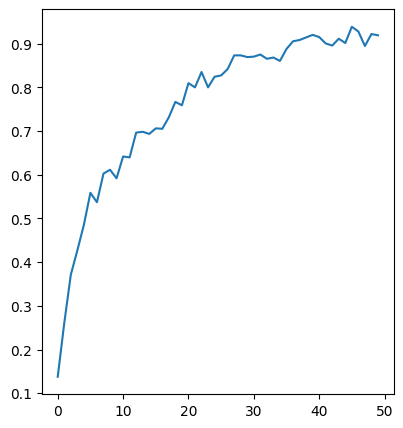

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model', 'test_generator', and 'history' are defined as in the provided code

# Uncomment these lines to evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions
predictions = model.predict(test_generator, steps=32)

# Get true labels


# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot accuracy over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['test_accuracy'], label='Test Accuracy')  # Adjusted here
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')  # Adjusted here
plt.legend()




array([0, 0, 0, ..., 8, 8, 8])

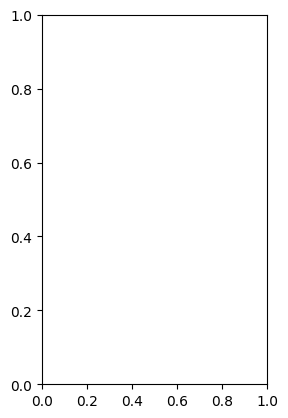

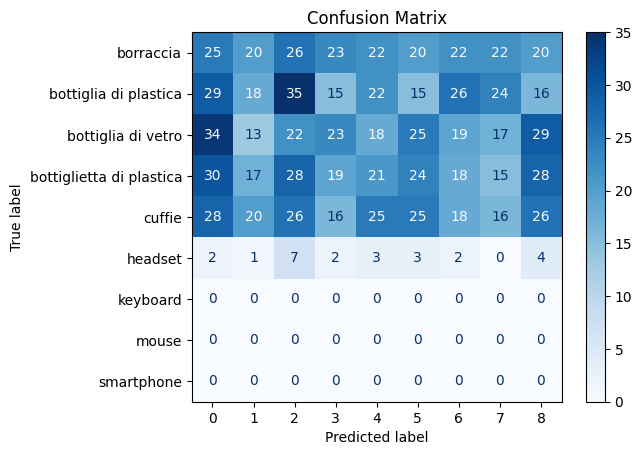

In [82]:
# Ensure that true_labels and predictions have the same length
min_length = min(len(true_labels), len(predictions))
true_labels = true_labels[:min_length]
predicted_labels = np.argmax(predictions, axis=1)[:min_length]

# Create confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)

# Define numeric labels (0 to 9)
numeric_labels = list(range(len(class_names)))

# Plot confusion matrix
plt.subplot(1, 2, 2)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='.4g')

# Set numeric labels on the x-axis
plt.xticks(ticks=numeric_labels, labels=numeric_labels)

plt.title('Confusion Matrix')

plt.show()


In [83]:
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

56/56 [==============================] - 6s 102ms/step - loss: 0.7465 - accuracy: 0.8627
Test Loss: 0.7465
Test Accuracy: 0.8627


In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

In [85]:
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

56/56 [==============================] - 6s 102ms/step


In [86]:
from sklearn.metrics import f1_score

# Ensure that true_labels and predictions have the same length
min_length = min(len(true_labels), len(predictions))
true_labels = true_labels[:min_length]
predicted_labels = np.argmax(predictions, axis=1)[:min_length]

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'Weighted F1 Score: {f1:.4f}')


Weighted F1 Score: 0.1273


## Con diversi modelli

In [88]:
from keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0, DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

# Define the base directory
base_dir = './immagini'

# Create the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# List of models to train
models_to_train = [VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0, DenseNet121]

for model_type in models_to_train:
    # Load the pre-trained base model without the top (fully connected) layers
    base_model = model_type(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add custom top layers for your specific classification task
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,  # You can adjust the number of epochs
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    # Evaluate the model on the test set
    test_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    test_loss, test_accuracy = model.evaluate(
        test_generator,
        steps=test_generator.samples // test_generator.batch_size
    )

    print(f'Model: {model_type.__name__}')
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Generate predictions
    predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

    # Get true labels
    true_labels = test_generator.classes

    # Calculate F1 score
    f1 = f1_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
    print(f'Weighted F1 Score: {f1:.4f}')

    # Create confusion matrix
    conf_mat = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

    # Plot confusion matrix
    plt.figure()
    disp = ConfusionMatrixDisplay(conf_mat, display_labels=train_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues, values_format='.4g')
    plt.title(f'Confusion Matrix - {model_type.__name__}')
    plt.show()

    # Print classification report
    report = classification_report(true_labels, np.argmax(predictions, axis=1), target_names=train_generator.class_indices.keys())
    print(f"Classification Report - {model_type.__name__}:\n", report)
    print("\n" + "="*50 + "\n")


Found 7200 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.
58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/10
  8/225 [>.............................] - ETA: 30:35 - loss: 3.1165 - accuracy: 0.0938

KeyboardInterrupt: 